###  `sklearn.preprocessing.KBinsDiscretizer` Discretizes continuous data to bins

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

### Importing modules

In [1]:
from sklearn.preprocessing import KBinsDiscretizer

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv('datasets/auto-mpg.csv', na_values='?')

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
221,17.5,8,305.0,145.0,3880,12.5,77,1,chevrolet caprice classic
262,19.2,8,305.0,145.0,3425,13.2,78,1,chevrolet monte carlo landau
186,27.0,4,101.0,83.0,2202,15.3,76,2,renault 12tl
60,20.0,4,140.0,90.0,2408,19.5,72,1,chevrolet vega
187,17.5,8,305.0,140.0,4215,13.0,76,1,chevrolet chevelle malibu classic
298,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
219,25.5,4,122.0,96.0,2300,15.5,77,1,plymouth arrow gs
101,23.0,6,198.0,95.0,2904,16.0,73,1,plymouth duster
350,34.7,4,105.0,63.0,2215,14.9,81,1,plymouth horizon 4
328,30.0,4,146.0,67.0,3250,21.8,80,2,mercedes-benz 240d


In [3]:
car_data.drop(columns=['car name',
                       'origin', 
                       'model year'], 
              inplace=True)

car_data.dropna(inplace=True)

car_data.reset_index(inplace=True, drop=True)

car_data.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration
167,20.0,6,232.0,100.0,2914,16.0
161,18.0,6,225.0,95.0,3785,19.0
103,12.0,8,400.0,167.0,4906,12.5
40,14.0,8,318.0,150.0,4096,13.0
306,33.5,4,151.0,90.0,2556,13.2
243,36.1,4,98.0,66.0,1800,14.4
110,18.0,3,70.0,90.0,2124,13.5
60,21.0,4,122.0,86.0,2226,16.5
333,32.4,4,107.0,72.0,2290,17.0
74,14.0,8,318.0,150.0,4077,14.0


### Plotting the dataset
Engine displacement is the size of the engine (usually expressed in cc, but is in cubic inches here). A bigger engine is one way to increase the power of the engine, but usually at the cost of fuel economy. The aim usually is to maximize horsepower and minimize engine displacement.

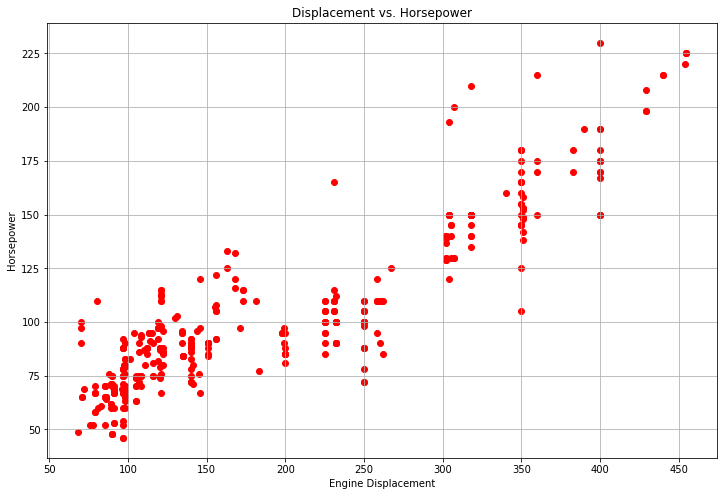

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(car_data['displacement'], 
            car_data['horsepower'], 
            color='red')

ax.set(xlabel='Engine Displacement', ylabel='Horsepower',
       title='Displacement vs. Horsepower')
ax.grid()

plt.show()

### Creating a KBinsDiscretizer object

In [5]:
k_bins = KBinsDiscretizer(n_bins=5, 
                          encode='ordinal', 
                          strategy='uniform')

k_bins

KBinsDiscretizer(encode='ordinal', n_bins=5, strategy='uniform')

### Fitting the object for the dataset and printing the shape 

In [6]:
k_bins_array = k_bins.fit_transform(car_data[['displacement','horsepower']])

k_bins_array.shape

(392, 2)

### Printing the values interms of bin

In [7]:
kbins_df = pd.DataFrame(data = k_bins_array,
                        columns = ['bin_displacement', 'bin_horsepower'])
kbins_df.sample(10)

,bin_displacement,bin_horsepower
325,0.0,0.0
233,0.0,0.0
28,3.0,3.0
8,4.0,4.0
391,0.0,0.0
62,4.0,3.0
385,0.0,1.0
328,0.0,0.0
249,3.0,2.0
212,3.0,2.0


### Concatenating the binned dataframe with the dataset

In [8]:
car_data_k_bins = pd.concat([car_data, kbins_df], axis=1)

car_data_k_bins.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower
134,16.0,8,302.0,140.0,4141,14.0,3.0,2.0
62,14.0,8,400.0,175.0,4385,12.0,4.0,3.0
291,31.9,4,89.0,71.0,1925,14.0,0.0,0.0
350,33.7,4,107.0,75.0,2210,14.4,0.0,0.0
351,32.4,4,108.0,75.0,2350,16.8,0.0,0.0
142,31.0,4,76.0,52.0,1649,16.5,0.0,0.0
117,24.0,4,116.0,75.0,2158,15.5,0.0,0.0
106,18.0,6,232.0,100.0,2789,15.0,2.0,1.0
337,23.5,6,173.0,110.0,2725,12.6,1.0,1.0
64,14.0,8,351.0,153.0,4129,13.0,3.0,2.0


In [9]:
car_data_k_bins['bin_displacement'].unique()

array([3., 4., 0., 1., 2.])

In [10]:
car_data_k_bins['bin_horsepower'].unique()

array([2., 3., 4., 1., 0.])

In [11]:
displacement_edges = k_bins.bin_edges_[0]
horsepower_edges = k_bins.bin_edges_[1]

displacement_edges, horsepower_edges

(array([ 68. , 145.4, 222.8, 300.2, 377.6, 455. ]),
 array([ 46. ,  82.8, 119.6, 156.4, 193.2, 230. ]))

### Creating a empty column with the name `Comment`

In [12]:
car_data_k_bins['Comment'] = ''

car_data_k_bins.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower,Comment
0,18.0,8,307.0,130.0,3504,12.0,3.0,2.0,
1,15.0,8,350.0,165.0,3693,11.5,3.0,3.0,
2,18.0,8,318.0,150.0,3436,11.0,3.0,2.0,
3,16.0,8,304.0,150.0,3433,12.0,3.0,2.0,
4,17.0,8,302.0,140.0,3449,10.5,3.0,2.0,


#### Populate the comment field
If the bin for horsepower is greater than the bin for displacement, we mark the car as efficient. If the displacement bin is higher than that for horsepower, it's considered inefficient.

In [13]:
car_data_k_bins.loc[car_data_k_bins['bin_displacement'] < 
                    car_data_k_bins['bin_horsepower'] ,
                    'Comment'] = 'Efficient'

In [14]:
car_data_k_bins.loc[car_data_k_bins['bin_displacement'] >
                    car_data_k_bins['bin_horsepower'] ,
                    'Comment'] = 'Inefficient'

In [15]:
car_data_k_bins.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,bin_displacement,bin_horsepower,Comment
241,21.5,3,80.0,110.0,2720,13.5,0.0,1.0,Efficient
268,21.1,4,134.0,95.0,2515,14.8,0.0,1.0,Efficient
369,36.0,4,105.0,74.0,1980,15.3,0.0,0.0,
33,16.0,6,225.0,105.0,3439,15.5,2.0,1.0,Inefficient
60,21.0,4,122.0,86.0,2226,16.5,0.0,1.0,Efficient
190,22.0,6,250.0,105.0,3353,14.5,2.0,1.0,Inefficient
327,44.6,4,91.0,67.0,1850,13.8,0.0,0.0,
5,15.0,8,429.0,198.0,4341,10.0,4.0,4.0,
28,9.0,8,304.0,193.0,4732,18.5,3.0,3.0,
330,32.7,6,168.0,132.0,2910,11.4,1.0,2.0,Efficient


In [16]:
categories = car_data_k_bins['Comment'].unique()

categories

array(['Inefficient', '', 'Efficient'], dtype=object)

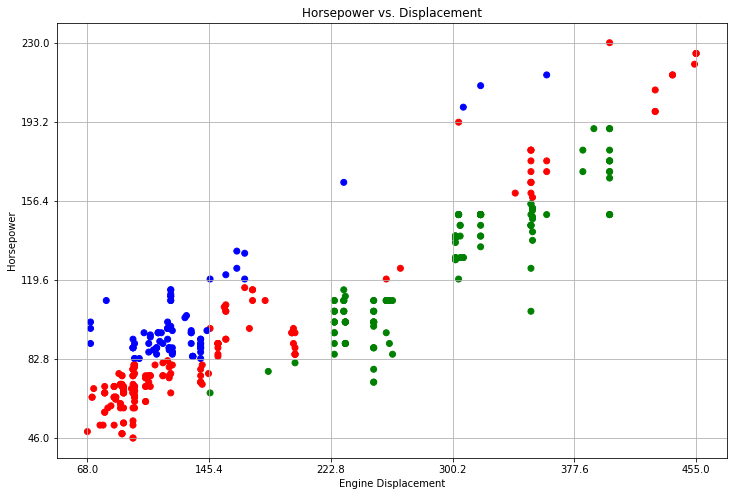

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {categories[0]:'green', 
          categories[1]:'red',
          categories[2]:'blue'}

ax.scatter(car_data_k_bins['displacement'], 
           car_data_k_bins['horsepower'], 
           c=car_data_k_bins['Comment'].apply(lambda x: colors[x]))

ax.set(xlabel='Engine Displacement', 
       ylabel='Horsepower',
       title='Horsepower vs. Displacement')

ax.grid()
ax.set_xticks(displacement_edges);
ax.set_yticks(horsepower_edges);

plt.show()